In [1]:
from classes.basic_optical_gating import BasicOpticalGating as BOG, BasicOpticalGatingPlotter as BOGP, Logger
from classes.drawer import Drawer

In [2]:
import copy
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from scipy.ndimage import gaussian_filter

In [4]:
class BOG_LF(BOG):
    def _pre_process_reference_sequence_bias_correction(self, frame_number=None):
        #return super()._pre_process_reference_sequence_bias_correction(frame_number)
        return gaussian_filter(self.reference_sequence.astype(np.int32), sigma = (0, 2, 2))
    
    def _preprocess_reference_sequence(self, frame_number=None):
        return gaussian_filter(self.reference_sequence, sigma = (0, 2, 2))

    
    def _preprocess_frame(self, frame_number):
        return gaussian_filter(self.sequence[frame_number],2)

# Real data
## Run optical gating

In [8]:
sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/brightfield/*tif"
reference_sequence = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.tif"
reference_sequence_period = "./data/2012-06-20 13.34.11 vid 2x2 multi phase single plane/ref_seq.txt"

og = BOG_LF()
og.logger.set_quiet()
og.set_sequence(sequence)
og.set_reference_sequence(reference_sequence)
og.set_reference_period(reference_sequence_period)
og.run(bias_correct=False)

og_bc = BOG_LF()
og_bc.logger.set_quiet()
og_bc.set_sequence(sequence)
og_bc.set_reference_sequence(reference_sequence)
og_bc.set_reference_period(reference_sequence_period)
og_bc.run(bias_correct=True)


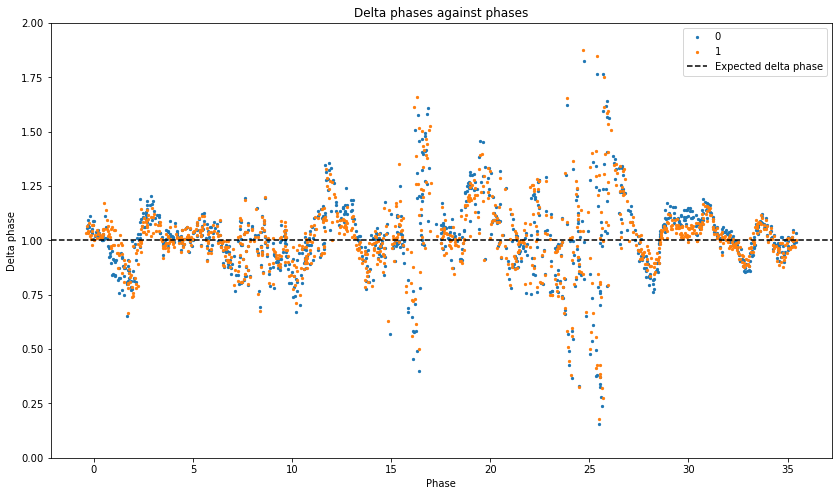

In [9]:
bogp = BOGP([og, og_bc])
bogp.plot_delta_phases_phases()

## Plot

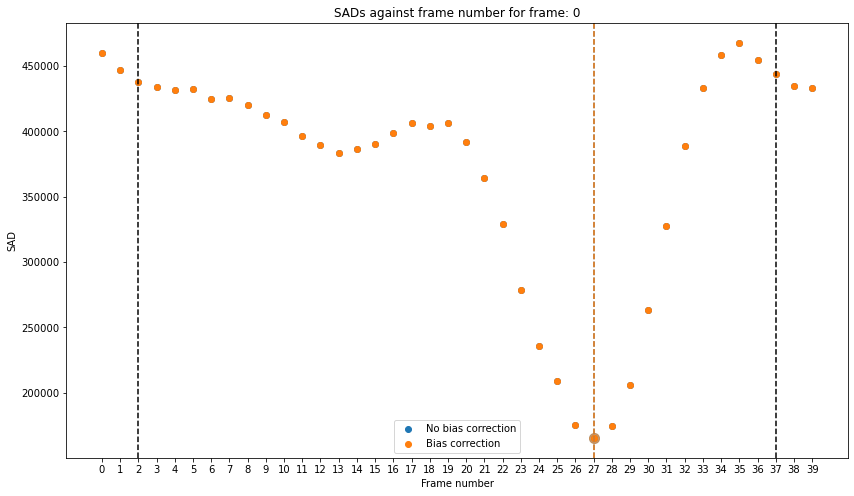

In [7]:
bog = BOGP([og, og_bc], ["No bias correction", "Bias correction"])
bog.plot_sads(0)